Import Library

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

Pisahkan x dan y kemudian masukkan masing-masing ke array yang terpisah

In [14]:
data = pd.read_csv('data_single.csv', usecols=[0, 1])
# x = pd.read_csv('data_single.csv', usecols=[0])
# y = pd.read_csv('data_single.csv', usecols=[1])
data
# ambil kolom X dan Y, pastikan X berbentuk 2D
x = data.iloc[:, 0].values.reshape(-1, 1)
y = data.iloc[:, 1].values

# x = np.array(x).reshape(-1,1)
# y = np.array(y)
data

,x,y
0,1,2
1,1,3
2,1,1
3,2,51
4,3,12
5,4,23
6,565,562
7,12,25
8,78,15
9,14,62


In [15]:
x

array([[   1],
       [   1],
       [   1],
       [   2],
       [   3],
       [   4],
       [ 565],
       [  12],
       [  78],
       [  14],
       [  51],
       [  25],
       [  62],
       [ 475],
       [   2],
       [5464],
       [  14]])

In [16]:
y

array([  2,   3,   1,  51,  12,  23, 562,  25,  15,  62,  73,  84,   3,
       625,  14,  25,   1])

Buat modelnya dan latih model regresi linear

In [19]:
model = LinearRegression().fit(x, y)

Lihat r^2, intercept, dan slope

In [20]:
print("=== Single Linear Regression ===")
print(f"Coefficient of Determination (R²): {model.score(x, y)}")
print(f"Intercept: {model.intercept_}")
print(f"Slope: {model.coef_}")

=== Single Linear Regression ===
Coefficient of Determination (R²): 0.001044527936749029
Intercept: 91.1359696789431
Slope: [0.00467796]


Predict nilai y dari x berdasarkan model

In [21]:
predicted_y = model.predict(x)
print("Predicted response:")
print(predicted_y)

Predicted response:
[ 91.14064764  91.14064764  91.14064764  91.1453256   91.15000357
  91.15468153  93.77901828  91.19210522  91.50085072  91.20146115
  91.37454575  91.25291873  91.42600333  93.35800169  91.1453256
 116.69635475  91.20146115]


Plot hasilnya

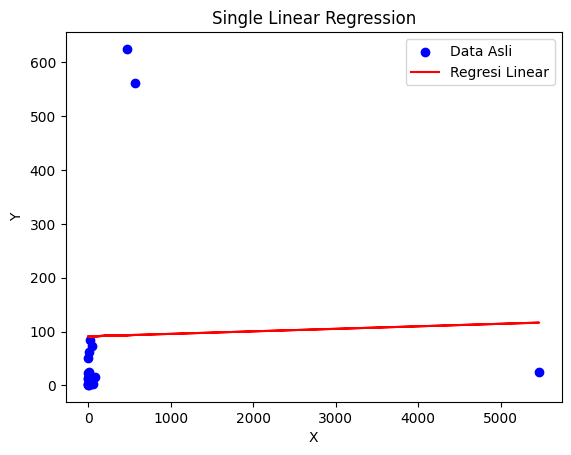

In [22]:
plt.scatter(x, y, color='blue', label='Data Asli')
plt.plot(x, predicted_y, color='red', label='Regresi Linear')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Single Linear Regression')
plt.legend()
plt.show()

# Polinomial Regression
### Perbandingan tahun dan populasi penduduk

=== Polynomial Regression ===
Degree: 2
Coefficient of Determination (R²): 0.9992291899369613
Intercept: -20453865096.04
Coefficients: [ 1.75387250e+07 -3.60223959e+03]
x to predict:
[[2005]
 [2006]
 [2015]
 [2016]
 [2030]]
Predicted y (Polynomial Regression):
[2.30185244e+08 2.33275386e+08 2.60762462e+08 2.63780559e+08
 3.05277449e+08]


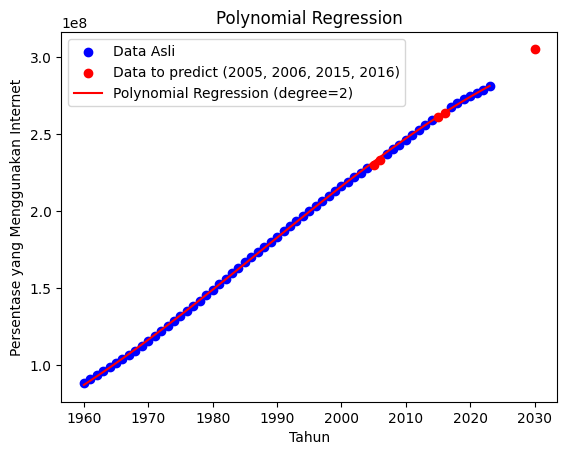

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures


# baca data dari CSV
data = pd.read_csv('year-population.csv', usecols=[0, 1])


# ambil X dan Y
x = data.iloc[:, 0].values.reshape(-1, 1)
y = data.iloc[:, 1].values


# derajat polinomial yang digunakan
degree = 2


# transformasi polinomial
poly_transformer = PolynomialFeatures(degree=degree, include_bias=False)
x_poly = poly_transformer.fit_transform(x)


# latih model regresi linier
model = LinearRegression().fit(x_poly, y)
r_sq = model.score(x_poly, y)


# output model
print("=== Polynomial Regression ===")
print(f"Degree: {degree}")
print(f"Coefficient of Determination (R²): {r_sq}")
print(f"Intercept: {model.intercept_}")
print(f"Coefficients: {model.coef_}")

#data yang ingin di predict
x_pred = np.array([[2005], [2006], [2015], [2016], [2030]])

x_pred_poly = poly_transformer.transform(x_pred)

# prediksi
y_poly_pred = model.predict(x_pred_poly)
print("x to predict:")
print(x_pred)
print("Predicted y (Polynomial Regression):")
print(y_poly_pred)


pred_sorted_indices = np.argsort(x_pred.flatten())
pred_x_sorted = x_pred[pred_sorted_indices]
pred_y_poly_sorted = y_poly_pred[pred_sorted_indices]


plt.scatter(x, y, color='blue', label='Data Asli')
plt.scatter(pred_x_sorted, pred_y_poly_sorted, color='red', label=f'Data to predict (2005, 2006, 2015, 2016)')
plt.plot(x_sorted, y_poly_sorted, color='red', label=f'Polynomial Regression (degree={degree})')
plt.xlabel('Tahun')
plt.ylabel('Persentase yang Menggunakan Internet')
plt.title('Polynomial Regression')
plt.legend()
plt.show()



# **Referensi:**
- https://realpython.com/linear-regression-in-python/#multiple-linear-regression-with-scikit-learn
- https://medium.com/@adiptamartulandi/belajar-machine-learning-simple-linear-regression-di-python-e82972695eaf
- https://scikit-learn.org/stable/auto_examples/linear_model/plot_polynomial_interpolation.html
- https://www.geeksforgeeks.org/python-extracting-rows-using-pandas-iloc/
- https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html
- https://github.com/motisoltani/Newton-Interpolation-Method-Python/blob/main/Newton%20interpolation.py
- https://pythonnumericalmethods.studentorg.berkeley.edu/notebooks/chapter17.04-Lagrange-Polynomial-Interpolation.html